In [1]:
import numpy as np
import os
from functools import partial
from transformers import CLIPModel, CLIPImageProcessor
from compute_pretrained_embeddings import get_embeddings
from dataloader import TarImageDataset, custom_collate_fn, FilteredTarImageDataset
from torch.utils.data import DataLoader
from my_utils import load_config

# config = load_config("semdedup_configs.yaml")

model_name = "openai/clip-vit-base-patch32"
tar_files_directory = os.path.abspath("data/raw")
batch_size = 32

# model = CLIPModel.from_pretrained(model_name)
image_processor = CLIPImageProcessor.from_pretrained(model_name)
my_collate_fn = partial(custom_collate_fn, image_processor=image_processor)

dataset_1 = TarImageDataset(tar_dir=tar_files_directory, transform=None)
# dataset_2 = TarImageDataset(tar_dir=tar_files_directory, transform=None)

dataloader_1 = DataLoader(
    dataset_1   , 
    batch_size=batch_size, 
    shuffle=False, 
    collate_fn=my_collate_fn,
    num_workers=0
)

# dataloader_2 = DataLoader(
#     dataset_2, 
#     batch_size=batch_size, 
#     shuffle=False, 
#     collate_fn=my_collate_fn,
#     num_workers=0
# )

# paths_str_type = 'U256' #'S256'
# embed_float_type = 'float32' #'S256'
# emb_memory_loc = config['embs_memory_loc']
# paths_memory_loc = config['path_memory_loc']
# dataset_size = dataset.__len__()
# emb_size = config['emd_size']

# emb_array = np.memmap(
#     emb_memory_loc, 
#     dtype=embed_float_type, 
#     mode='w+', 
#     shape=(dataset_size, emb_size)
# )

# path_array = np.memmap(
#     paths_memory_loc, 
#     dtype=paths_str_type,
#     mode='w+', 
#     shape=(dataset_size,)
# )

/home/fbernardi/miniconda3/envs/semdedup_mio_ipykernel/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
type(dataloader_1.dataset.samples)

list

In [2]:
uids = [
    'd84cefb32975139db7f9cfa4e9f00fb0',
    '7e69a66689f697d961c18f085af23d8c',
    '4f42e5fd6e85a45b05714b85cd4d377d',
    'd40f4f15a8c92ebebdb6a5785bf38b98',
    '4c713e8b4570343bf145173ed81d4a5e',
    '4bc6c2b72aa3329e55f1b691b235623b',
    '4d8369a80f2568d18b55bd1f2c5a845d',
    '49f7a340f89ce6da3ce3f57f4bf749c9',
    '4a8aba8b2b14c13b4893fc7d097e7aee',
    '9cccb9c6edbabafbb16c72da39b79a0d',
    'c0d11419d5feba7804611b2e7e443766',
    'f3855836da7c7ae30d4adacf826952fd',
    'bfde488faeafb92deacaab312ff84e6b',
    '66e6218b03f860b49ad832a5dd9b75d0',
    'aa087d0634b06147123160054570668b',
    '0ca47ab6d993ad0cfd6ceaa506313764',
    '28862c1bccbe3bbb27accc16a6236b92',
    '034ebfa2dafca719c922f6302f07136f',
    '96c9bdfb61f1ceacde404fa7985d6b67',
    '504daadac8b939e73e036d3fdc71ccac',
    '90f8bfaa173b7a1b74d0f12cd19e3808',
    '0761363b3ae1432381e2eec8c3a32483',
    'cb4032c02bdef8c61d5f73352394816e',
    '26a198b9baa9e2ae68e82bba281f7f76',
    'd973e86eecf13b53638a0b1c5fcdff4a',
    '7b975f36d3e3f20a2ab01736d7515fb8',
    '62b776f59179feb8b245ba21d37599ad',
    '21136b07d56deda9015fdd405c978e16',
    'acc404e5f0e6c71f920dd622e0cfc823',
    '7cbae343a6621db21181738de0a247ab',
    'b74ac240fc60bd7ecc216ec0b28c7366',
    'b4faa4595ec0d2c87712afdedf180c90'
]

In [3]:
filt_dataset = FilteredTarImageDataset(dataset_1, uids)
filt_dataloader = DataLoader(
    filt_dataset   , 
    batch_size=5, 
    shuffle=False, 
    collate_fn=my_collate_fn,
    num_workers=0
)

In [4]:
filt_dataloader.dataset.filtered_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [5]:
len(filt_dataset) == len(uids)

True

In [21]:
dataset_1.__dict__

{'tar_dir': '/home/fbernardi/Documents/SemDeDup/data/raw',
 'transform': None,
 'samples': [('/home/fbernardi/Documents/SemDeDup/data/raw/00000000_reduced.tar',
   '000000000084.jpg',
   'd84cefb32975139db7f9cfa4e9f00fb0'),
  ('/home/fbernardi/Documents/SemDeDup/data/raw/00000000_reduced.tar',
   '000000000002.jpg',
   '7e69a66689f697d961c18f085af23d8c'),
  ('/home/fbernardi/Documents/SemDeDup/data/raw/00000000_reduced.tar',
   '000000000001.jpg',
   '4f42e5fd6e85a45b05714b85cd4d377d'),
  ('/home/fbernardi/Documents/SemDeDup/data/raw/00000000_reduced.tar',
   '000000000095.jpg',
   'd40f4f15a8c92ebebdb6a5785bf38b98'),
  ('/home/fbernardi/Documents/SemDeDup/data/raw/00000000_reduced.tar',
   '000000000047.jpg',
   '4c713e8b4570343bf145173ed81d4a5e'),
  ('/home/fbernardi/Documents/SemDeDup/data/raw/00000000_reduced.tar',
   '000000000003.jpg',
   '4bc6c2b72aa3329e55f1b691b235623b'),
  ('/home/fbernardi/Documents/SemDeDup/data/raw/00000000_reduced.tar',
   '000000000025.jpg',
   '4d8369a8

In [22]:
dataset_1.__getitem__(0)

(<PIL.Image.Image image mode=RGB size=135x90>,
 'd84cefb32975139db7f9cfa4e9f00fb0',
 0)

In [14]:
filt_dataset.__getitem__(31)

(<PIL.Image.Image image mode=RGB size=180x120>,
 'b4faa4595ec0d2c87712afdedf180c90',
 31)

In [16]:
len(dataset_1)

1000

In [17]:
len(filt_dataset)

32

In [6]:
import torch

In [30]:
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version PyTorch is built with:", torch.version.cuda)
print("CUDA device count:", torch.cuda.device_count())

PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA version PyTorch is built with: 12.4
CUDA device count: 1


In [9]:
# -- Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# -- model
model = model.to(device)
model = model.eval()

cuda


In [9]:
print(
    "\n", dataset_1.__getitem__(0),
    "\n", dataset_1.__getitem__(10),
    "\n", dataset_1.__getitem__(100),
    # "\n", dataset_1.__getitem__(1000),
    # "\n", dataset_1.__getitem__(10000)
)


 (<PIL.Image.Image image mode=RGB size=135x90 at 0x76A086317DA0>, 'd84cefb32975139db7f9cfa4e9f00fb0', 0) 
 (<PIL.Image.Image image mode=RGB size=300x462 at 0x76A085818320>, 'c0d11419d5feba7804611b2e7e443766', 10) 
 (<PIL.Image.Image image mode=RGB size=300x320 at 0x76A0858182F0>, '82ac34dc9b3a1faedfa88961c01c6031', 100)


In [8]:
print(
    "\n", filt_dataset.__getitem__(0),
    "\n", filt_dataset.__getitem__(10)
)


 (<PIL.Image.Image image mode=RGB size=135x90 at 0x7FF231B9E540>, 'd84cefb32975139db7f9cfa4e9f00fb0', 0) 
 (<PIL.Image.Image image mode=RGB size=300x462 at 0x7FF23393AD80>, 'c0d11419d5feba7804611b2e7e443766', 10)


In [11]:
print(
    "\n", dataset_2.__getitem__(0),
    "\n", dataset_2.__getitem__(10),
    "\n", dataset_2.__getitem__(100),
    # "\n", dataset_2.__getitem__(1000),
    # "\n", dataset_2.__getitem__(10000)
    )

NameError: name 'dataset_2' is not defined

In [9]:
count = 0
with torch.no_grad():
    for data_batch_1, paths_batch_1, batch_indices_1 in filt_dataloader:
        if count == 6:
            break
        count += 1

In [10]:
paths_batch_1

['b74ac240fc60bd7ecc216ec0b28c7366', 'b4faa4595ec0d2c87712afdedf180c90']

In [11]:
batch_indices_1

[30, 31]

In [8]:
with torch.no_grad():
    for data_batch_2, paths_batch_2, batch_indices_2 in dataloader_1:
        if True:
            break

In [ ]:
with torch.no_grad():
    for data_batch_2, paths_batch_2, batch_indices_2 in dataloader_2:
        if True:
            break

In [18]:
ind = 31

(data_batch_1[ind] == data_batch_2[ind]).sum(dim=(0,1,2)) == data_batch_1[ind].shape[0]*data_batch_1[ind].shape[1]*data_batch_1[ind].shape[2]

tensor(True, device='cuda:0')

In [19]:
(data_batch_1[ind] == data_batch_2[ind]).sum(dim=(0,1,2))

tensor(150528, device='cuda:0')

In [11]:
data_batch_1[ind].shape[0]*data_batch_1[ind].shape[1]*data_batch_1[ind].shape[2]

150528

In [15]:
paths_batch_1[ind]

'000000030063.jpg'

[`get_image_features`](https://huggingface.co/docs/transformers/en/model_doc/clip#transformers.CLIPModel.get_image_features)

In [11]:
encodings = model.get_image_features(
    pixel_values=data_batch
)

In [12]:
encodings.shape

torch.Size([32, 512])

In [13]:
from torch.nn.functional import normalize

In [14]:
embeds_normalized = normalize(encodings, dim=1)

In [16]:
path_array[batch_indices] = paths_batch

In [17]:
emb_array[batch_indices] = embeds_normalized.cpu().detach().numpy()

In [18]:
emb_array[batch_indices]

array([[-0.02233509, -0.02032149,  0.02072333, ...,  0.09887572,
        -0.00211839, -0.01152895],
       [ 0.00800907,  0.02617006,  0.00255419, ...,  0.03405451,
         0.01636192,  0.00202419],
       [-0.0636093 , -0.01677628,  0.04364581, ...,  0.07423619,
        -0.03214012,  0.00549925],
       ...,
       [ 0.02042953,  0.01727075,  0.00955408, ...,  0.05227413,
        -0.02564773,  0.02683108],
       [-0.02755074,  0.05310895,  0.00985589, ...,  0.06265323,
         0.02549751, -0.00182506],
       [ 0.01792138, -0.0007999 ,  0.02287464, ..., -0.04192063,
         0.01003846,  0.01667938]], dtype=float32)

In [22]:
path_array[batch_indices]

array(['000000000527.jpg', '000000010133.jpg', '000000000084.jpg',
       '000000011394.jpg', '000000010571.jpg', '000000011143.jpg',
       '000000010723.jpg', '000000010278.jpg', '000000010409.jpg',
       '000000010302.jpg', '000000000439.jpg', '000000000519.jpg',
       '000000010795.jpg', '000000010349.jpg', '000000010793.jpg',
       '000000011156.jpg', '000000011020.jpg', '000000000422.jpg',
       '000000000787.jpg', '000000011053.jpg', '000000011151.jpg',
       '000000010932.jpg', '000000000345.jpg', '000000011260.jpg',
       '000000010872.jpg', '000000000739.jpg', '000000010979.jpg',
       '000000000960.jpg', '000000000224.jpg', '000000010368.jpg',
       '000000000979.jpg', '000000000912.jpg'], dtype='<U256')

In [17]:
file_path = 'data/clustering/dist_to_cent.npy'
# file_path = '/home/fbernardi/Documents/SemDeDup/data/clustering/kmeans_centroids.npy'
# file_path = '/home/fbernardi/Documents/SemDeDup/data/clustering/nearest_cent.npy'

print(np.load(file_path),
np.load(file_path).shape)

[0.8304051  0.6413146  0.706396   0.78168803 0.7437374  0.8609312
 0.7698801  0.7811434  0.6720158  0.65754205 0.6780554  0.83724844
 0.77107626 0.67963874 0.69380045 0.93092066 0.7990431  0.77338517
 0.6974254  0.74994403 0.7533419  0.6678712  0.86436975 0.8366996
 0.8890548  0.8728093  0.8198053  0.8478641  0.9336188  0.87039983
 0.8972523  0.7763189  0.63057435 0.84217656 0.70471746 0.8918737
 0.78372055 0.8026148  0.55111873 0.74032015 0.69029653 0.76565677
 0.8560949  0.6265466  0.7495909  0.94196665 0.79901415 0.8013949
 0.7740673  0.7835656  0.84025073 0.7836523  0.7831646  0.71955734
 0.86096823 0.6635511  0.74601036 0.8422367  0.7930409  0.6925982
 0.8172868  0.68986297 0.8218048  0.6461877  0.74282974 0.84176666
 0.7478234  0.7538944  0.70428926 0.7789314  0.7256626  0.8379635
 0.81704026 0.74293315 0.87448996 0.6765898  0.75841075 0.8341144
 0.6951889  0.74614686 0.81680965 0.7530203  0.9587983  0.7854042
 0.73952216 0.72772413 0.87634706 0.81158495 0.82372385 0.87807083
 0.

In [23]:
import numpy as np

file_path = "/home/fbernardi/Documents/SemDeDup/data/embeddings/embs.npy"
data = np.memmap(
    file_path,
    dtype='float32',
    mode='r',  # read-only
    shape=(len(dataset_1), 512)
)

print("Loaded data:", data)

Loaded data: [[-0.06169079 -0.0102066   0.05043098 ...  0.07736553 -0.02590037
   0.00019399]
 [ 0.01249706  0.03154689 -0.0076748  ...  0.00796812 -0.02512775
  -0.04890383]
 [ 0.01647453  0.0281105   0.01191993 ... -0.01810824 -0.0085584
  -0.04372336]
 ...
 [ 0.01104397  0.04002876  0.01143567 ...  0.05352483 -0.02635215
   0.00722142]
 [ 0.02005599 -0.00231839 -0.01579346 ...  0.08371221 -0.00996522
   0.02393234]
 [-0.03503444  0.02175331 -0.0112963  ...  0.05476329 -0.00147074
  -0.01168044]]


In [24]:
file_path = "/home/fbernardi/Documents/SemDeDup/data/embeddings/path.npy"
paths_str_type = 'U256'

paths = np.memmap(
    file_path,
    dtype=paths_str_type,
    mode='r',  # read-only
    shape=(len(dataset_1),)
)

In [26]:
paths

memmap(['d84cefb32975139db7f9cfa4e9f00fb0',
        '7e69a66689f697d961c18f085af23d8c',
        '4f42e5fd6e85a45b05714b85cd4d377d',
        'd40f4f15a8c92ebebdb6a5785bf38b98',
        '4c713e8b4570343bf145173ed81d4a5e',
        '4bc6c2b72aa3329e55f1b691b235623b',
        '4d8369a80f2568d18b55bd1f2c5a845d',
        '49f7a340f89ce6da3ce3f57f4bf749c9',
        '4a8aba8b2b14c13b4893fc7d097e7aee',
        '9cccb9c6edbabafbb16c72da39b79a0d',
        'c0d11419d5feba7804611b2e7e443766',
        'f3855836da7c7ae30d4adacf826952fd',
        'bfde488faeafb92deacaab312ff84e6b',
        '66e6218b03f860b49ad832a5dd9b75d0',
        'aa087d0634b06147123160054570668b',
        '0ca47ab6d993ad0cfd6ceaa506313764',
        '28862c1bccbe3bbb27accc16a6236b92',
        '034ebfa2dafca719c922f6302f07136f',
        '96c9bdfb61f1ceacde404fa7985d6b67',
        '504daadac8b939e73e036d3fdc71ccac',
        '90f8bfaa173b7a1b74d0f12cd19e3808',
        '0761363b3ae1432381e2eec8c3a32483',
        'cb4032c02bdef8c61d5f733

In [27]:
path_array[batch_indices]

NameError: name 'path_array' is not defined

In [1]:
import numpy as np

In [27]:
np.load("/home/fbernardi/Documents/SemDeDup/data/sorted_clusters/cluster_0.npy")

array([['4d64ca93de191f3dbb2267b3fec4dabc', '345', '0.28602999448776245',
        '0'],
       ['28418389e5408e092302e1cdee69a86f', '209', '0.23630082607269287',
        '0'],
       ['47669a9dcbd1c30dbd028fe1278fa64e', '36', '0.21627944707870483',
        '0'],
       ['c88751c12bce6237f03ab19b565c66e4', '83', '0.21459579467773438',
        '0'],
       ['7b2bde5768acab08f854b745159a5064', '118', '0.19274646043777466',
        '0'],
       ['0527d759ac54a1b726ba7114f152eb89', '789', '0.16616922616958618',
        '0']], dtype='<U32')

In [29]:
dataset_1.__getitem__(345)

(<PIL.Image.Image image mode=RGB size=300x300>,
 '4d64ca93de191f3dbb2267b3fec4dabc',
 345)

In [30]:
np.load("/home/fbernardi/Documents/SemDeDup/data/sorted_clusters/cluster_1.npy")

array([['19e90be6618e73c86c1730369089aa3f', '661', '0.39448660612106323',
        '1'],
       ['9cccb9c6edbabafbb16c72da39b79a0d', '9', '0.34245795011520386',
        '1'],
       ['2cc11124635dcd648f6940d5b4b6703e', '237', '0.31149810552597046',
        '1'],
       ['17cbb752f158e0d7632310e23ef26c72', '78', '0.30481112003326416',
        '1'],
       ['9069fbecb8e5ff3fa7bee9b435d8b216', '777', '0.28639572858810425',
        '1'],
       ['9f82cc4c8d7d81273100c4d6806f0a92', '544', '0.25376081466674805',
        '1'],
       ['f0b99acf1670c8947216947313a33c1b', '627', '0.23552381992340088',
        '1'],
       ['ff266c758bec3e90931561d3ebe9f823', '505', '0.23103082180023193',
        '1'],
       ['2a20f52e2472790ffae5401b808320fc', '699', '0.23049086332321167',
        '1'],
       ['706a132fb2451c6b374dd7a4d0ad068d', '113', '0.22893071174621582',
        '1'],
       ['0f37cabbb262aa9a06a8e137101c631f', '341', '0.2267625331878662',
        '1'],
       ['891d43f070c85d69867e28f72c4

In [33]:
np.load("/home/fbernardi/Documents/SemDeDup/data/clustering/dist_to_cent.npy").shape

(1000,)

In [35]:
np.load("/home/fbernardi/Documents/SemDeDup/data/clustering/kmeans_centroids.npy").shape

(50, 512)

In [36]:
np.load("/home/fbernardi/Documents/SemDeDup/data/clustering/nearest_cent.npy")[0]

41

In [39]:
np.load("/home/fbernardi/Documents/SemDeDup/data/sorted_clusters/cluster_41.npy")[:, 1]

array(['90', '603', '452', '183', '12', '397', '574', '272', '825', '735',
       '0', '903', '139', '697', '696', '863', '878', '500', '35', '924',
       '838'], dtype='<U32')

In [40]:
np.load("/home/fbernardi/Documents/SemDeDup/data/sorted_clusters/cluster_41.npy")

array([['53fd3b996c853588d61cd0db0af4cc15', '90', '0.4346503019332886',
        '41'],
       ['0180bb04d4805f214ae0d035fee8fc53', '603', '0.28229546546936035',
        '41'],
       ['b1196a7d326952be2215c3af05751d3f', '452', '0.26549071073532104',
        '41'],
       ['cdc45842d3b6ca2012d96a4b7140eaac', '183', '0.2390449047088623',
        '41'],
       ['bfde488faeafb92deacaab312ff84e6b', '12', '0.2289237380027771',
        '41'],
       ['8e6e22e6ad51cd21b7457c75892c1cf3', '397', '0.21813833713531494',
        '41'],
       ['dafe29f39f9da14fe5e6e055990ce19b', '574', '0.2126142382621765',
        '41'],
       ['229f6d7bbd5c11c79350880681ffbff9', '272', '0.1959822177886963',
        '41'],
       ['d4cb747c29e79bde66b7c484937b7945', '825', '0.19221192598342896',
        '41'],
       ['7b24fd7f6ed7d8e4358899e375a89864', '735', '0.19071722030639648',
        '41'],
       ['d84cefb32975139db7f9cfa4e9f00fb0', '0', '0.1695948839187622',
        '41'],
       ['90835778dbe7d27b58e0e4

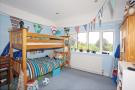

In [43]:
dataset_1.__getitem__(0)[0]

In [51]:
sum(np.load("/home/fbernardi/Documents/SemDeDup/data/embeddings/nearest_cent.npy") == 41)

21

In [44]:
import pandas as pd
import pickle
import numpy as np

In [46]:
with open('/home/fbernardi/Documents/SemDeDup/data/clustering/kmeans_index.pickle', 'rb') as file:
    kmeans_index = pickle.load(file)


In [49]:
with open('/home/fbernardi/Documents/SemDeDup/data/dataframes/cluster_41.pkl', 'rb') as file:
    pruning_table = pickle.load(file)


In [50]:
pruning_table

,indices,image_id_in_dataset,cluster_url,eps=1e-05,eps=2e-05,eps=5e-05,eps=0.0001,eps=0.0002,eps=0.0005,eps=0.001,...,eps=3.2,eps=3.4,eps=3.6,eps=3.8,eps=4.0,eps=4.2,eps=4.4,eps=4.6,eps=4.8,eps=5.0
0,20,838,a087ee7b7ae843da7c8454c77ae9d3ba,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,19,924,17b23af208b213726686c5e4e19cf77c,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,18,35,1332ef06ec98e3460924dc345992e99e,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,17,500,cdd19c57f21b606b8974c704da89e760,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,16,878,c0858ce1e751578844ba67e652d00b79,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
5,15,863,caa3dda476f13701b23bd001337973e5,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
6,14,696,ff89b0ed0c615c5a12605c7caf6fcb72,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
7,13,697,a936c320efce5264f591d26eb0d91f35,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
8,12,139,09dec40459369ade8d18c74ac6a0fee6,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
9,11,903,90835778dbe7d27b58e0e46f378f0517,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [52]:
dataloader_1.dataset.__getitem__(0)

(<PIL.Image.Image image mode=RGB size=135x90>,
 'd84cefb32975139db7f9cfa4e9f00fb0',
 0)

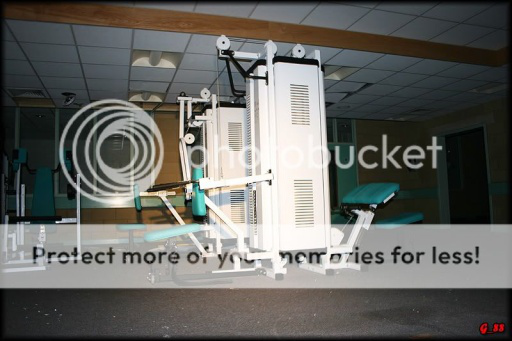

In [33]:
dataloader_1.dataset.__getitem__(6555)[0]

In [53]:
with open('/home/fbernardi/Documents/SemDeDup/data/statistics/dataframes/shard_0.pkl', 'rb') as file:
    shard = pickle.load(file)


In [54]:
shard

,cluster_size,cluster_id,avg_sim_to_cent,std_sim_to_cent,std_pair_w_sim,avg_sim_to_others_list,max_pair_w_sim_list,min_pair_w_sim_list
0,6,0,0.781313,3.719070e-02,tensor(0.1064),"[tensor(0.5818), tensor(0.5569), tensor(0.5364...","[tensor(0.6699), tensor(0.6699), tensor(0.6015...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,23,1,0.771713,6.235939e-02,tensor(0.0732),"[tensor(0.6528), tensor(0.6392), tensor(0.6346...","[tensor(0.7920), tensor(0.7485), tensor(0.7485...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,15,2,0.768526,4.700727e-02,tensor(0.0803),"[tensor(0.6293), tensor(0.6144), tensor(0.5945...","[tensor(0.8459), tensor(0.8459), tensor(0.7102...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,15,3,0.746363,9.592509e-02,tensor(0.0908),"[tensor(0.6053), tensor(0.6036), tensor(0.5999...","[tensor(0.7129), tensor(0.7684), tensor(0.7684...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,31,4,0.761544,6.007457e-02,tensor(0.0675),"[tensor(0.6500), tensor(0.6221), tensor(0.6181...","[tensor(0.8101), tensor(0.7940), tensor(0.7735...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,30,5,0.811754,8.358292e-02,tensor(0.0798),"[tensor(0.7130), tensor(0.7124), tensor(0.7069...","[tensor(0.8179), tensor(0.8173), tensor(0.8649...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,31,6,0.753913,6.448479e-02,tensor(0.0642),"[tensor(0.6229), tensor(0.6183), tensor(0.6017...","[tensor(0.7255), tensor(0.7060), tensor(0.7127...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,9,7,0.732335,9.266689e-02,tensor(0.0963),"[tensor(0.5693), tensor(0.5516), tensor(0.5290...","[tensor(0.7100), tensor(0.7694), tensor(0.6423...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,3,8,0.758902,4.128992e-02,tensor(0.0997),"[tensor(0.4140), tensor(0.3767), tensor(0.3010)]","[tensor(0.4897), tensor(0.4897), tensor(0.3382)]","[tensor(0.), tensor(0.), tensor(0.)]"
0,4,9,0.754880,4.461223e-02,tensor(0.1054),"[tensor(0.4959), tensor(0.4348), tensor(0.3965...","[tensor(0.6216), tensor(0.6216), tensor(0.4833...","[tensor(0.), tensor(0.), tensor(0.), tensor(0.)]"


In [55]:
import torch

# Replace 'your_file_path.pt' with the actual path to your .pt file
file_path = '/home/fbernardi/Documents/SemDeDup/data/statistics/dicts/shard_0.pt'

# Load the .pt file
pt_data = torch.load(file_path, weights_only=False)

# Print the loaded data
print(pt_data)


{1e-05:     duplicates_ratio num_duplicates cluster_id
0                0.0              0          0
1                0.0              0          0
2                0.0              0          0
3                0.0              0          0
4                0.0              0          0
..               ...            ...        ...
8                0.0              0         48
9                0.0              0         48
10               0.0              0         48
0                0.0              0         49
1                0.0              0         49

[998 rows x 3 columns], 2e-05:     duplicates_ratio num_duplicates cluster_id
0                0.0              0          0
1                0.0              0          0
2                0.0              0          0
3                0.0              0          0
4                0.0              0          0
..               ...            ...        ...
8                0.0              0         48
9                0.0